In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
CPD=pd.read_csv(r'CarPricesData.csv')
CPD

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


In [3]:
CPD.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [4]:
# Target variable is price
Categorical_data=['FuelType','HP','Metcolor','Automatic','CC','Doors']
Continous_data=['Price','Age','KM','Weight']

In [5]:
CPD.shape

(1436, 10)

In [6]:
CPD=CPD.drop_duplicates()

In [7]:
CPD.shape

(1435, 10)

In [8]:
CPD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [9]:
CPD.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
mean,10720.915679,56.020237,68571.782578,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


<Axes: >

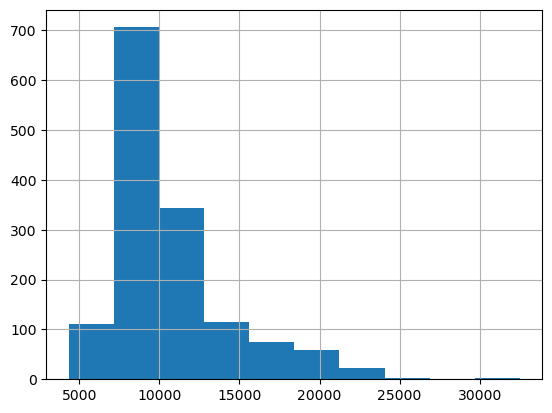

In [10]:
# Checking target variable 
CPD['Price'].hist()

In [11]:
CPD['Price'][CPD['Price']>28000]=28000

C:\Users\Wrlcome\AppData\Local\Temp\ipykernel_428\2864550335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPD['Price'][CPD['Price']>28000]=28000


<Axes: >

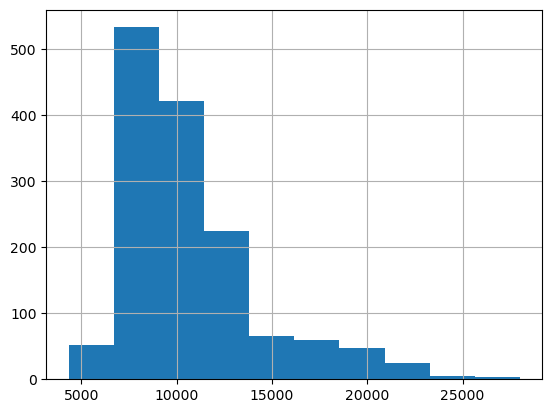

In [12]:
CPD['Price'].hist()

In [13]:
#Visualizing all the Categorical variables
def CategoricalPlot(Inpdata,colslist):
    fig,subplot=plt.subplots(nrows=1,ncols=len(colslist),figsize=(14,4))
    for col,plotnumber in zip(colslist,range(len(colslist))):
        print(Inpdata.groupby(col).size().plot(kind='bar',ax=subplot[plotnumber]))

Axes(0.125,0.11;0.110714x0.77)
Axes(0.257857,0.11;0.110714x0.77)
Axes(0.390714,0.11;0.110714x0.77)
Axes(0.523571,0.11;0.110714x0.77)
Axes(0.656429,0.11;0.110714x0.77)
Axes(0.789286,0.11;0.110714x0.77)


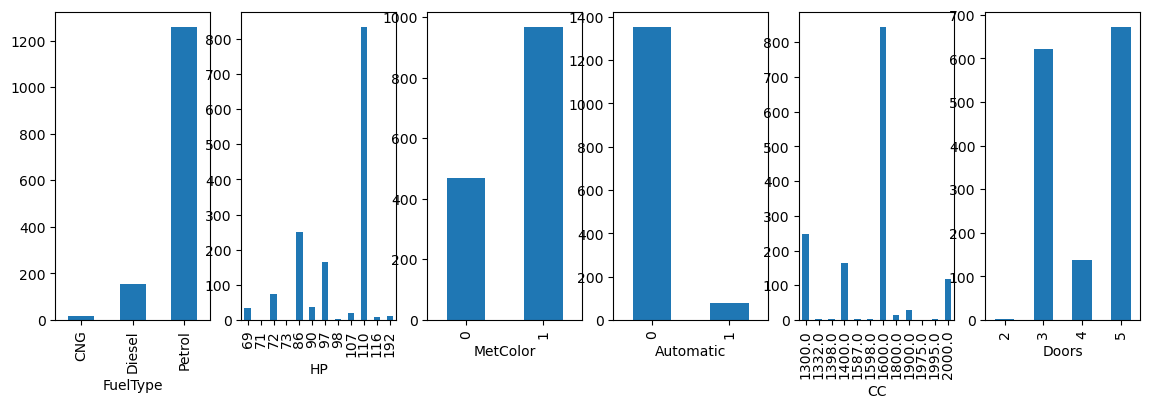

In [14]:
CategoricalPlot(CPD,['FuelType','HP','MetColor','Automatic','CC','Doors'])

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'KM'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

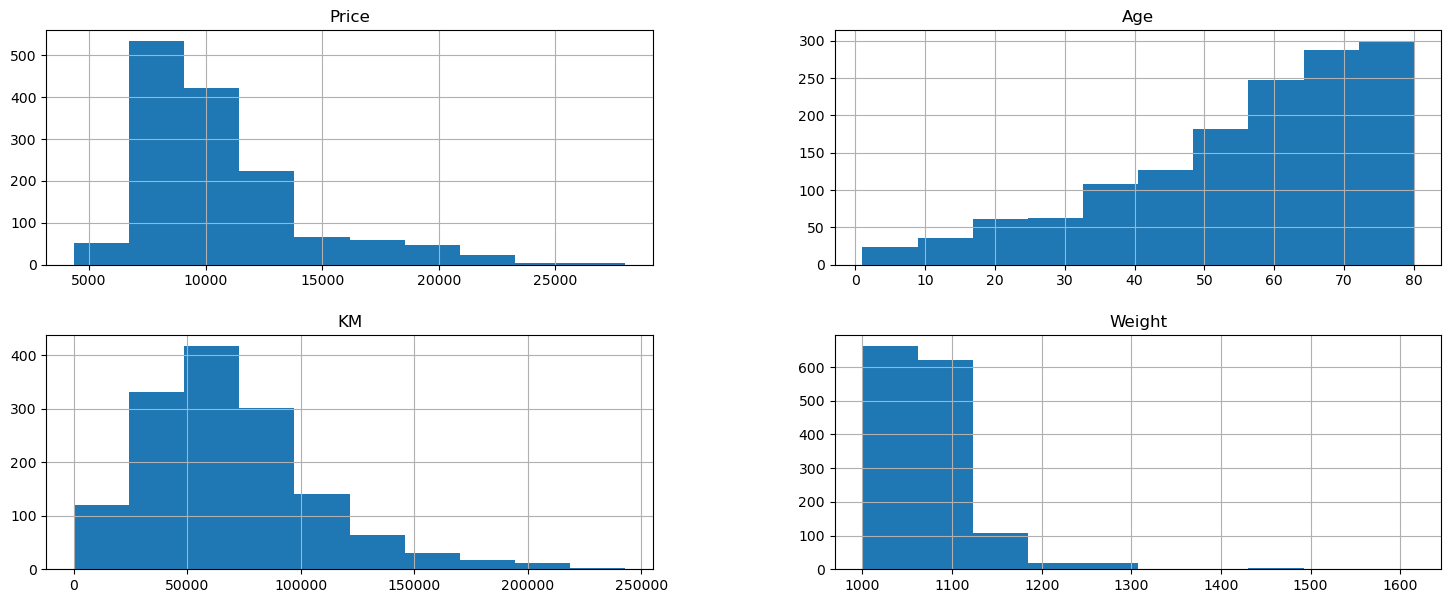

In [15]:
CPD[['Price','Age','KM','Weight']].hist(figsize=(18,7))

In [16]:
CorrelationData=CPD[['Price','Age','KM','Weight']].corr()
CorrelationData

,Price,Age,KM,Weight
Price,1.000000,-0.879899,-0.572050,0.565829
Age,-0.879899,1.000000,0.503485,-0.465909
KM,-0.572050,0.503485,1.000000,-0.024290
Weight,0.565829,-0.465909,-0.024290,1.000000


In [17]:
GroupedData1=CPD.groupby('FuelType')
GroupedData1

In [18]:
GroupedData2=CPD.groupby('HP')
GroupedData2

In [19]:
GroupedData3=CPD.groupby('MetColor')
GroupedData3

In [20]:
GroupedData4=CPD.groupby('CC')
GroupedData4

In [21]:
GroupedData5=CPD.groupby('Automatic')
GroupedData5

In [22]:
GroupedData6=CPD.groupby('Doors')
GroupedData6

<Axes: xlabel='FuelType'>

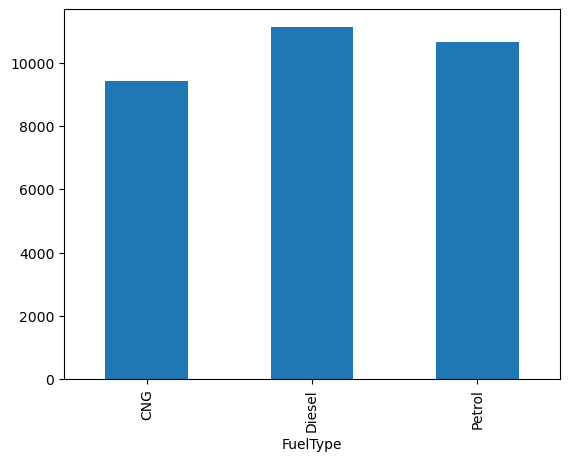

In [23]:
GroupedData1.mean()['Price'].plot(kind='bar')

<Axes: xlabel='HP'>

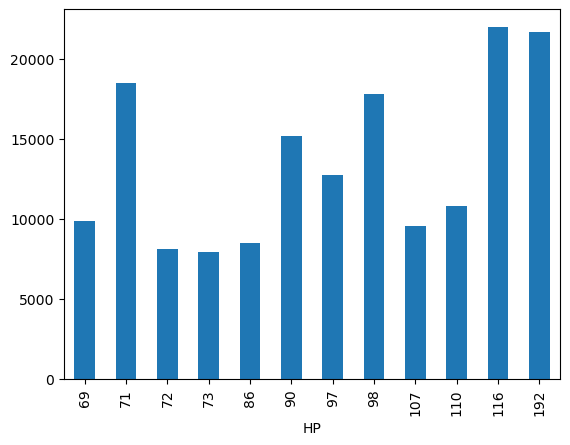

In [24]:
GroupedData2['Price'].mean().plot(kind='bar')

<Axes: xlabel='MetColor'>

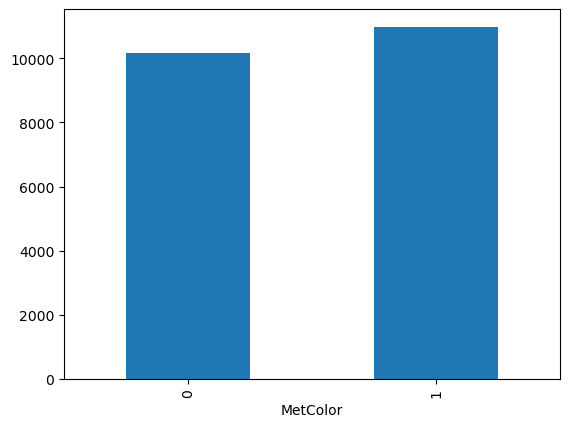

In [25]:
GroupedData3['Price'].mean().plot(kind='bar')

<Axes: xlabel='CC'>

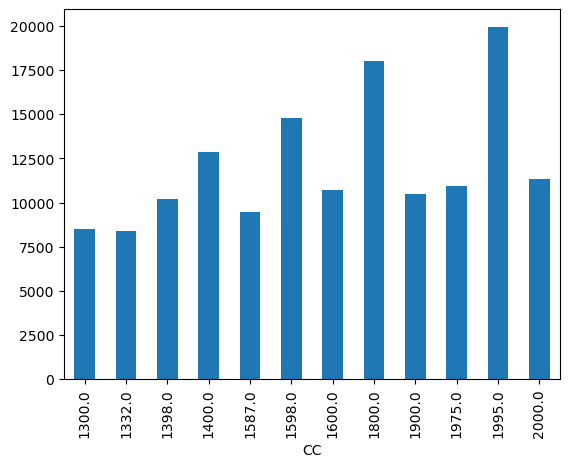

In [26]:
GroupedData4['Price'].mean().plot(kind='bar')

<Axes: xlabel='Automatic'>

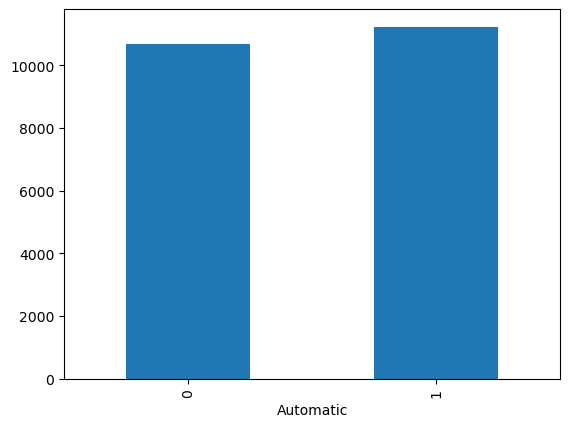

In [27]:
GroupedData5['Price'].mean().plot(kind='bar')

<Axes: xlabel='Doors'>

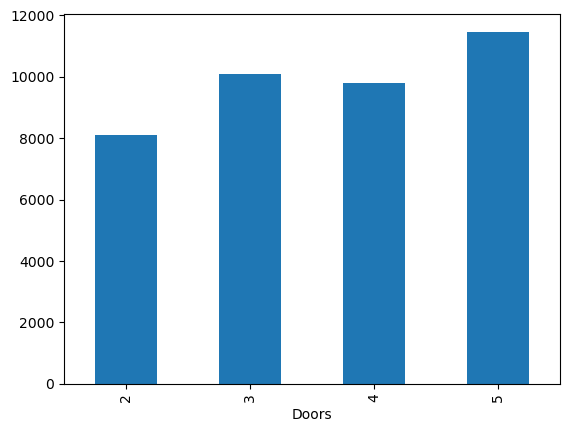

In [28]:
GroupedData6['Price'].mean().plot(kind='bar')

In [29]:
CorrelationData['Price'][abs(CorrelationData['Price'])>0.5]

Price     1.000000
Age      -0.879899
KM       -0.572050
Weight    0.565829
Name: Price, dtype: float64

In [30]:
from scipy.stats import f_oneway
Categorylist=CPD.groupby('FuelType')['Price'].apply(list)
AnnovaTest1=f_oneway(*Categorylist)
print('P value :',AnnovaTest1[1])

P value : 0.1019230057422753


In [31]:
Categorylist1=CPD.groupby('CC')['Price'].apply(list)
AnnovaTest2=f_oneway(*Categorylist1)
print('P value :',AnnovaTest2[1])

P value : 2.6371722477381424e-48


In [32]:
Categorylist2=CPD.groupby('Automatic')['Price'].apply(list)
AnnovaTest3=f_oneway(*Categorylist2)
print('P value :',AnnovaTest3[1])

P value : 0.1874111687587136


In [33]:
Categorylist3=CPD.groupby('MetColor')['Price'].apply(list)
AnnovaTest4=f_oneway(*Categorylist)
print('P value :',AnnovaTest4[1])

P value : 0.1019230057422753


In [34]:
Categorylist4=CPD.groupby('Doors')['Price'].apply(list)
AnnovaTest5=f_oneway(*Categorylist4)
print('P value :',AnnovaTest5[1])

P value : 9.389432656567049e-13


In [35]:
Categorylist5=CPD.groupby('HP')['Price'].apply(list)
AnnovaTest6=f_oneway(*Categorylist)
print('P value :',AnnovaTest6[1])

P value : 0.1019230057422753


In [36]:
# Result of annova test {CC, Doors}
# result of correlation {price,age,km,weight}

<Axes: xlabel='Age', ylabel='Price'>

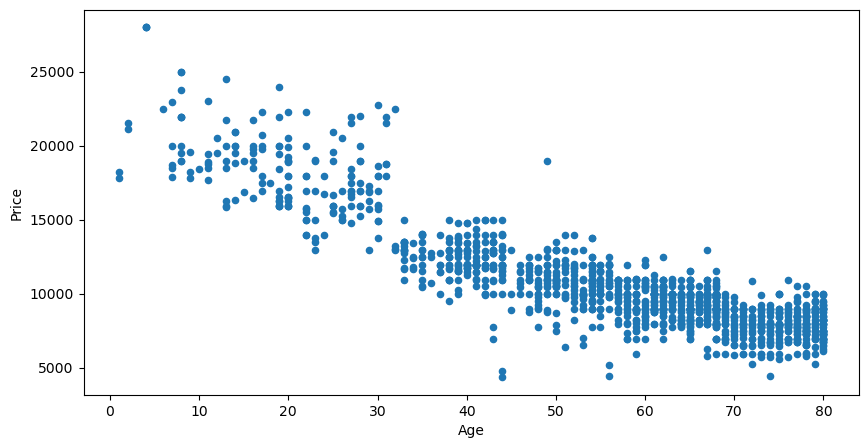

In [37]:
CPD.plot.scatter(x='Age',y='Price',figsize=(10,5))

<Axes: xlabel='KM', ylabel='Price'>

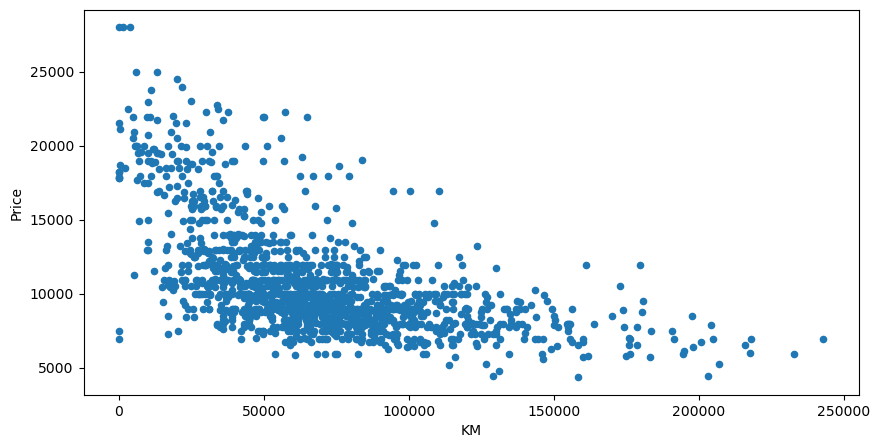

In [38]:
CPD.plot.scatter(x='KM',y='Price',figsize=(10,5))

<Axes: xlabel='Weight', ylabel='Price'>

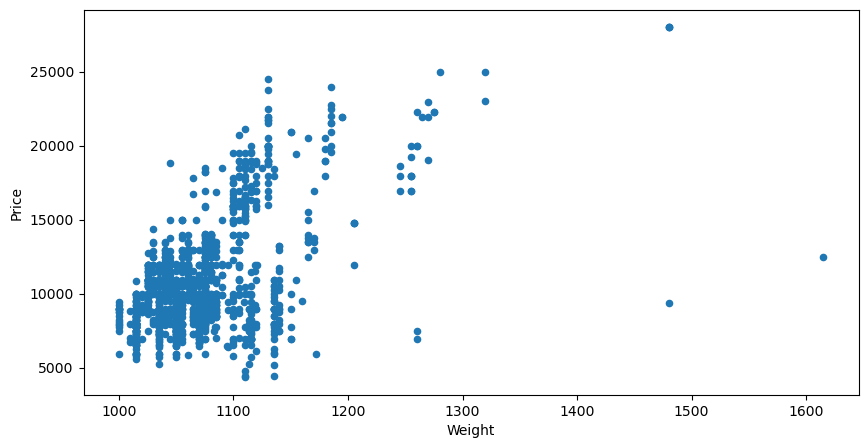

In [39]:
CPD.plot.scatter(x='Weight',y='Price',figsize=(10,5))

In [40]:
# Removing Outliers
CPD['Weight']=CPD['Weight'][CPD['Weight']<1400]

C:\Users\Wrlcome\AppData\Local\Temp\ipykernel_428\3085690635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPD['Weight']=CPD['Weight'][CPD['Weight']<1400]


<Axes: xlabel='Weight', ylabel='Price'>

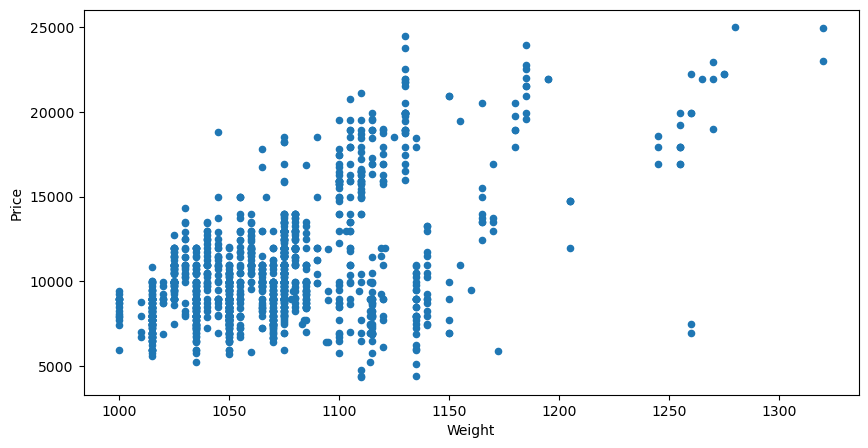

In [41]:
CPD.plot.scatter(x='Weight',y='Price',figsize=(10,5))

In [42]:
FilterCondition1=CPD['Weight']>1250
FilterCondition2=CPD['Price']<10000
RowsToDel=CPD[FilterCondition1 & FilterCondition2].index
print(RowsToDel)
CPD.drop(RowsToDel,axis=0,inplace=True)


Index([601, 654], dtype='int64')


C:\Users\Wrlcome\AppData\Local\Temp\ipykernel_428\2181154743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPD.drop(RowsToDel,axis=0,inplace=True)


<Axes: xlabel='Weight', ylabel='Price'>

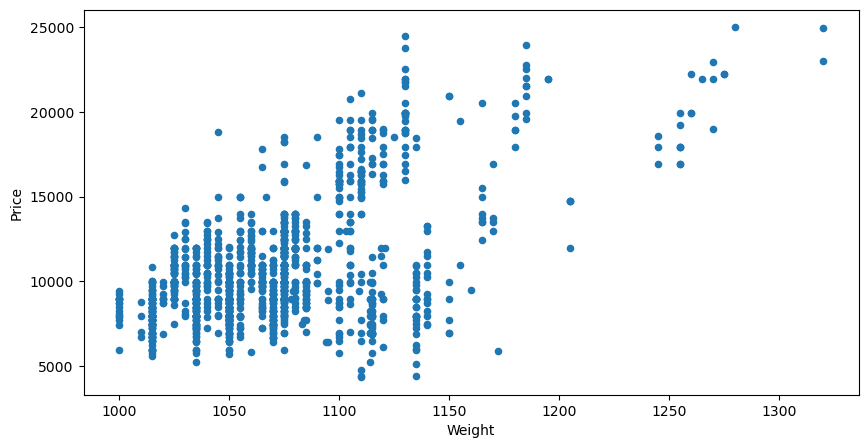

In [43]:
CPD.plot.scatter(x='Weight',y='Price',figsize=(10,5))

## Data Preprocessing

In [44]:
CPD.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [45]:
CPD.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       7
dtype: int64

In [46]:
CPD['Age']=CPD['Age'].interpolate(method='linear')

C:\Users\Wrlcome\AppData\Local\Temp\ipykernel_428\3152439197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPD['Age']=CPD['Age'].interpolate(method='linear')


In [47]:
CPD['CC']=CPD['CC'].interpolate(method='bfill')

C:\Users\Wrlcome\AppData\Local\Temp\ipykernel_428\781321080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPD['CC']=CPD['CC'].interpolate(method='bfill')


In [48]:
CPD['Weight']=CPD['Weight'].fillna(CPD['Weight'].mean())

C:\Users\Wrlcome\AppData\Local\Temp\ipykernel_428\2212933005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPD['Weight']=CPD['Weight'].fillna(CPD['Weight'].mean())


In [49]:
CPD.isnull().sum()

Price        0
Age          0
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [50]:
CPD['FuelType']=CPD['FuelType'].fillna(CPD['FuelType'].mode()[0])

C:\Users\Wrlcome\AppData\Local\Temp\ipykernel_428\2263583601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPD['FuelType']=CPD['FuelType'].fillna(CPD['FuelType'].mode()[0])


In [51]:
CPD.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [52]:
CPD.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [53]:
CPD=pd.get_dummies(CPD,dtype=int)

In [54]:
CPD

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,86,1,0,1300.0,3,1025.0,0,0,1
1432,10845,72.0,19000,86,0,0,1300.0,3,1015.0,0,0,1
1433,8500,71.0,17016,86,0,0,1300.0,3,1015.0,0,0,1
1434,7250,70.0,16916,86,1,0,1300.0,3,1015.0,0,0,1


## Machine learning Models

In [55]:
CPD.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')

In [56]:
Tar_var='Price'
Predicted_var=['Weight','Age', 'KM','CC', 'Doors']
X=CPD[Predicted_var].values
y=CPD[Tar_var].values

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
X_train.shape

(1003, 5)

In [59]:
y_train.shape

(1003,)

### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR

LinearRegression()

In [62]:
REG=LR.fit(X_train,y_train)
y_pred=REG.predict(X_test)

In [64]:
from sklearn import metrics
print('R2_score value :',metrics.r2_score(y_test,y_pred))

R2_score value : 0.8256774809599278


In [69]:
print('Accuracy :',100-np.mean(np.abs((y_test-y_pred)/y_test)*100))

Accuracy : 90.68252756686238


In [72]:
PredictedDF=pd.DataFrame(data=X_test,columns=Predicted_var)
PredictedDF['Tar_var']=y_test
PredictedDF['Predicted']=y_pred
PredictedDF

,Weight,Age,KM,CC,Doors,Tar_var,Predicted
0,1075.0,35.0,18000.0,1600.0,5.0,13995,14173.312593
1,1025.0,54.0,39000.0,1400.0,3.0,10750,10704.704931
2,1070.0,60.0,36943.0,1600.0,5.0,9500,10810.022830
3,1040.0,48.0,26938.0,1600.0,3.0,10950,11643.397974
4,1035.0,63.0,44944.0,1600.0,4.0,8250,9276.162470
...,...,...,...,...,...,...,...
425,1115.0,11.0,12500.0,1600.0,5.0,18900,18237.598320
426,1075.0,52.0,35823.0,1600.0,5.0,11500,11877.221981
427,1070.0,71.0,64000.0,1600.0,5.0,6999,8949.380236
428,1075.0,54.0,60239.0,1600.0,5.0,10750,11068.055458


## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor
REG=DecisionTreeRegressor(max_depth=4,criterion='friedman_mse')
REG

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)

In [74]:
DTR=REG.fit(X_train,y_train)
y_pred=DTR.predict(X_test)

In [75]:
print('R2_score value :',metrics.r2_score(y_test,y_pred))
print('Accuracy :',100-np.mean(np.abs((y_test-y_pred)/y_test)*100))
PredictedDF1=pd.DataFrame(data=X_test,columns=Predicted_var)
PredictedDF1['Tar_var']=y_test
PredictedDF1['Predicted']=y_pred
PredictedDF1

R2_score value : 0.8880534223744482
Accuracy : 91.25091157561435


,Weight,Age,KM,CC,Doors,Tar_var,Predicted
0,1075.0,35.0,18000.0,1600.0,5.0,13995,12364.722222
1,1025.0,54.0,39000.0,1400.0,3.0,10750,10874.701754
2,1070.0,60.0,36943.0,1600.0,5.0,9500,9362.443662
3,1040.0,48.0,26938.0,1600.0,3.0,10950,10874.701754
4,1035.0,63.0,44944.0,1600.0,4.0,8250,9362.443662
...,...,...,...,...,...,...,...
425,1115.0,11.0,12500.0,1600.0,5.0,18900,18511.320000
426,1075.0,52.0,35823.0,1600.0,5.0,11500,10874.701754
427,1070.0,71.0,64000.0,1600.0,5.0,6999,8076.396000
428,1075.0,54.0,60239.0,1600.0,5.0,10750,10874.701754


## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
REG=RandomForestRegressor(max_depth=4,n_estimators=200,criterion='friedman_mse')
REG

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=200)

In [77]:
RFR=REG.fit(X_train,y_train)
y_pred=RFR.predict(X_test)

In [78]:
print('R2_score value :',metrics.r2_score(y_test,y_pred))
print('Accuracy :',100-np.mean(np.abs((y_test-y_pred)/y_test)*100))
PredictedDF2=pd.DataFrame(data=X_test,columns=Predicted_var)
PredictedDF2['Tar_var']=y_test
PredictedDF2['Predicted']=y_pred
PredictedDF2

R2_score value : 0.9049076072439944
Accuracy : 91.97747055788041


,Weight,Age,KM,CC,Doors,Tar_var,Predicted
0,1075.0,35.0,18000.0,1600.0,5.0,13995,12419.211436
1,1025.0,54.0,39000.0,1400.0,3.0,10750,10911.077711
2,1070.0,60.0,36943.0,1600.0,5.0,9500,9489.421231
3,1040.0,48.0,26938.0,1600.0,3.0,10950,11147.711563
4,1035.0,63.0,44944.0,1600.0,4.0,8250,9445.969252
...,...,...,...,...,...,...,...
425,1115.0,11.0,12500.0,1600.0,5.0,18900,18869.061931
426,1075.0,52.0,35823.0,1600.0,5.0,11500,11011.101600
427,1070.0,71.0,64000.0,1600.0,5.0,6999,8131.691077
428,1075.0,54.0,60239.0,1600.0,5.0,10750,10919.157061
